In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [3]:
data_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
data_df.shape

(42000, 785)

In [5]:
# Data preparation for model building 
y=data_df['label']
x=data_df.drop('label',axis=1)

In [6]:
x_for_test_data=test_df[:]

In [7]:
type(x)

pandas.core.frame.DataFrame

7


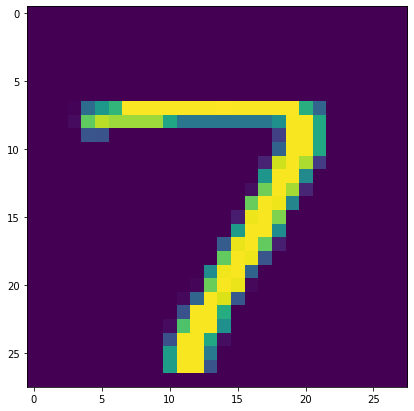

In [9]:
plt.figure(figsize=(7,7))
some_digit=1234
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<AxesSubplot:xlabel='label', ylabel='count'>

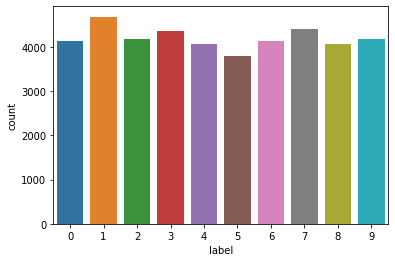

In [10]:
sns.countplot( x='label', data=data_df) 

In [11]:
# Splitting the dataset into test and train data
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

# KNN MODELS


In [12]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_train.shape

(29400, 784)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### With K = 3

In [14]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = classifier.predict(x_test)

c:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
print(accuracy_score(y_test, y_pred))

0.7641269841269841


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.98      0.62      1236
           1       1.00      0.86      0.92      1370
           2       0.94      0.76      0.84      1252
           3       0.94      0.66      0.77      1369
           4       0.98      0.54      0.69      1215
           5       0.95      0.51      0.66      1132
           6       0.96      0.89      0.92      1216
           7       0.92      0.83      0.87      1326
           8       0.51      0.90      0.65      1197
           9       0.84      0.69      0.76      1287

    accuracy                           0.76     12600
   macro avg       0.85      0.76      0.77     12600
weighted avg       0.85      0.76      0.78     12600



In [23]:

print(confusion_matrix(y_test, y_pred))

[[1217    0    0    0    0    0    5    0   14    0]
 [  29 1174   10    1    0    0    5    3  148    0]
 [ 230    1  956    6    0    0    4    4   46    5]
 [ 232    2   30  899    0   25    1    7  170    3]
 [ 322    0    0    0  651    1   11   20  129   81]
 [ 256    0    0   32    0  575   20    1  245    3]
 [ 112    0    0    0    1    1 1088    0   14    0]
 [  54    0   21    6    2    0    0 1098   71   74]
 [ 107    0    0    3    2    2    2    2 1078    1]
 [ 116    0    0    6    6    4    1   63  199  892]]


#### K=5

In [25]:
classifier5 = KNeighborsClassifier(n_neighbors = 5)
classifier5.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred5 = classifier5.predict(x_test)

c:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
print(accuracy_score(y_test, y_pred5))

0.8011111111111111


In [29]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.59      0.99      0.73      1236
           1       1.00      0.89      0.94      1370
           2       0.94      0.82      0.87      1252
           3       0.94      0.76      0.84      1369
           4       0.99      0.58      0.73      1215
           5       0.93      0.55      0.69      1132
           6       0.95      0.92      0.93      1216
           7       0.94      0.85      0.89      1326
           8       0.49      0.94      0.65      1197
           9       0.84      0.70      0.76      1287

    accuracy                           0.80     12600
   macro avg       0.86      0.80      0.80     12600
weighted avg       0.86      0.80      0.81     12600



In [30]:

print(confusion_matrix(y_test, y_pred5))

[[1220    0    0    0    0    0    4    0   12    0]
 [   3 1223   14    2    2    0    7    0  118    1]
 [ 156    1 1025    9    0    0    5    7   45    4]
 [  69    2   29 1037    0   33    2    8  186    3]
 [ 222    0    0    0  705    0   20    8  174   86]
 [ 165    0    1   45    0  622   22    1  273    3]
 [  78    0    0    0    1    2 1120    0   15    0]
 [  29    0   17    5    0    0    0 1124   82   69]
 [  56    0    4    4    0    6    3    0 1121    3]
 [  86    0    1    4    2    4    1   46  246  897]]


#### K=7

In [36]:
classifier7 = KNeighborsClassifier(n_neighbors = 7)
classifier7.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [37]:
y_pred7 = classifier7.predict(x_test)

c:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
print(accuracy_score(y_test, y_pred7))

0.8068253968253968


In [39]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76      1236
           1       1.00      0.90      0.95      1370
           2       0.94      0.84      0.89      1252
           3       0.93      0.77      0.85      1369
           4       0.99      0.59      0.74      1215
           5       0.96      0.54      0.69      1132
           6       0.94      0.92      0.93      1216
           7       0.94      0.85      0.89      1326
           8       0.48      0.95      0.64      1197
           9       0.84      0.70      0.76      1287

    accuracy                           0.81     12600
   macro avg       0.86      0.80      0.81     12600
weighted avg       0.87      0.81      0.81     12600



In [40]:

print(confusion_matrix(y_test, y_pred7))

[[1217    0    0    0    0    0    5    0   14    0]
 [   1 1236   13    4    1    0    7    1  107    0]
 [ 125    0 1051   12    0    0    6    5   49    4]
 [  58    2   29 1056    0   14    2    7  196    5]
 [ 185    0    1    0  720    0   23    8  183   95]
 [ 147    0    2   44    0  614   23    1  298    3]
 [  73    1    0    0    1    4 1115    0   22    0]
 [  35    0   19    6    2    0    0 1121   76   67]
 [  43    0    4    5    0    6    2    0 1134    3]
 [  65    0    0    3    3    3    1   46  264  902]]


#### K =9

In [41]:
classifier9 = KNeighborsClassifier(n_neighbors = 9)
classifier9.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [42]:
y_pred9 = classifier9.predict(x_test)

c:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:

print(accuracy_score(y_test, y_pred9))

0.8102380952380952


In [44]:
print(classification_report(y_test, y_pred9))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1236
           1       1.00      0.91      0.95      1370
           2       0.95      0.85      0.90      1252
           3       0.94      0.78      0.85      1369
           4       0.99      0.60      0.75      1215
           5       0.96      0.53      0.68      1132
           6       0.94      0.92      0.93      1216
           7       0.94      0.84      0.89      1326
           8       0.48      0.96      0.64      1197
           9       0.83      0.70      0.76      1287

    accuracy                           0.81     12600
   macro avg       0.87      0.81      0.81     12600
weighted avg       0.87      0.81      0.82     12600



In [45]:

print(confusion_matrix(y_test, y_pred9))

[[1216    0    0    0    0    0    5    0   15    0]
 [   1 1247   10    3    0    0    6    1  102    0]
 [ 107    0 1067   10    1    0    7    5   51    4]
 [  51    2   23 1064    0   16    3    7  198    5]
 [ 150    0    0    0  725    0   27    8  202  103]
 [ 154    0    1   42    0  602   23    2  304    4]
 [  69    0    0    0    0    4 1121    0   22    0]
 [  32    0   20    7    1    0    0 1113   82   71]
 [  33    0    3    3    0    4    2    0 1149    3]
 [  57    0    0    1    3    3    1   42  275  905]]


#### K = 11

In [48]:
classifier11 = KNeighborsClassifier(n_neighbors = 11)
classifier11.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [49]:
y_pred11 = classifier11.predict(x_test)

c:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\manav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:

print(accuracy_score(y_test, y_pred11))

0.8115079365079365


In [51]:

print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79      1236
           1       1.00      0.90      0.95      1370
           2       0.95      0.86      0.90      1252
           3       0.94      0.78      0.85      1369
           4       0.99      0.59      0.74      1215
           5       0.96      0.54      0.69      1132
           6       0.94      0.93      0.93      1216
           7       0.95      0.84      0.89      1326
           8       0.47      0.96      0.64      1197
           9       0.83      0.70      0.76      1287

    accuracy                           0.81     12600
   macro avg       0.87      0.81      0.81     12600
weighted avg       0.87      0.81      0.82     12600



In [52]:

print(confusion_matrix(y_test, y_pred11))

[[1219    0    0    0    0    0    3    0   14    0]
 [   1 1239    8    4    0    0    6    1  111    0]
 [  96    0 1077    9    0    0    7    4   55    4]
 [  50    2   24 1067    0   14    3    7  199    3]
 [ 137    0    0    0  721    0   30    5  217  105]
 [ 147    0    1   42    1  608   24    2  302    5]
 [  67    1    0    0    0    4 1126    0   18    0]
 [  38    0   19    7    1    0    0 1112   84   65]
 [  31    0    5    1    1    3    2    0 1152    2]
 [  53    0    0    2    3    6    2   42  275  904]]
